In [7]:
import pathlib
import matplotlib as mpl
import pandas as pd
import scanpy as sc
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt


savefig_args = {
    "dpi": 300,
    "bbox_inches": "tight",
    "pad_inches": 0.1,
    "transparent": True,
}

mpl.rc("savefig", dpi=300)
output_dir = "/home/michaelswift/repos/tabula-bursa/analysis/SI"
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
output_suffix = ""
output_formats = [".png", ".eps", ".pdf"]

def save_figure(
    fig,
    name,
    output_dir=output_dir,
    output_suffix=output_suffix,
    output_formats=output_formats,
    savefig_args=savefig_args,
):
    for output_format in output_formats:
        fig.savefig(
            output_dir + "/" + name + output_suffix + output_format, **savefig_args
        )
    return None

sc.set_figure_params(dpi_save=150, frameon=False,
 vector_friendly=True, fontsize=6, figsize=(3,3), format='pdf', transparent=True)

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 100)
%load_ext autoreload
%autoreload 2
%run ../helper.py
#%run ../honeyplot.py
sns.set_style("ticks")
plt.style.use('../bursa.mplstyle')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the Data

In [8]:
# adata = sc.read_h5ad("../../../data/bcells.h5ad.gz", backed = 'r')
# create simple subanatomical tissue label 
#adata.obs.loc[:,"subanatomical_simple"] = adata.obs.sample_uid.str.replace("_HTa|_HTb|_HT|_a|_b|over", "", regex = True).str.split("_", expand=True).iloc[:,-1].str.replace("1|2|3", "", regex = True)
#adata.obs.loc[:,"subanatomical_location"] = adata.obs.sample_uid.str.replace("_HTa|_HTb|_HT|_a|_b|over", "", regex = True).str.split("_", expand=True).iloc[:,-1]
#adata = adata[adata.obs.vdj_sequence != 'nan']

In [13]:
data = pd.read_table("../../../data/integrated_cell_calls_ambient_annotated.tsv.gz")

/tmp/ipykernel_6696/403120737.py:1: DtypeWarning: Columns (2,3,4,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,46,54,56,58,59,60,63,73,76,77,78,79,80,83,84,86,88,91,101,103,105,107,112,113,114,115,116,117,120,121,122,128) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table("../../../data/integrated_cell_calls_ambient_annotated.tsv.gz")


In [14]:
# filter data to remove non-sensical c region annos
colors = get_IGH_colors()
data = data[data.c_call.isin(colors.keys())]
#data.c_call = data.c_call.cat.remove_unused_categories()

In [15]:
data.loc[:,"simple_c_call"] = data.c_call.str.replace("1|2|3|4", "", regex = True)
data.loc[:,"emulsion_id"] = data.sample_uid.str.replace("HTa|HTb", "HT", regex=True)

In [16]:
plot_data = data.groupby(['donor', 'emulsion_id', 'subanatomical_location', 'vdj_sequence', 'simple_c_call']).size().reset_index()
plot_data = plot_data.groupby(['donor','subanatomical_location', 'emulsion_id']).simple_c_call.value_counts(normalize = True).reset_index()

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


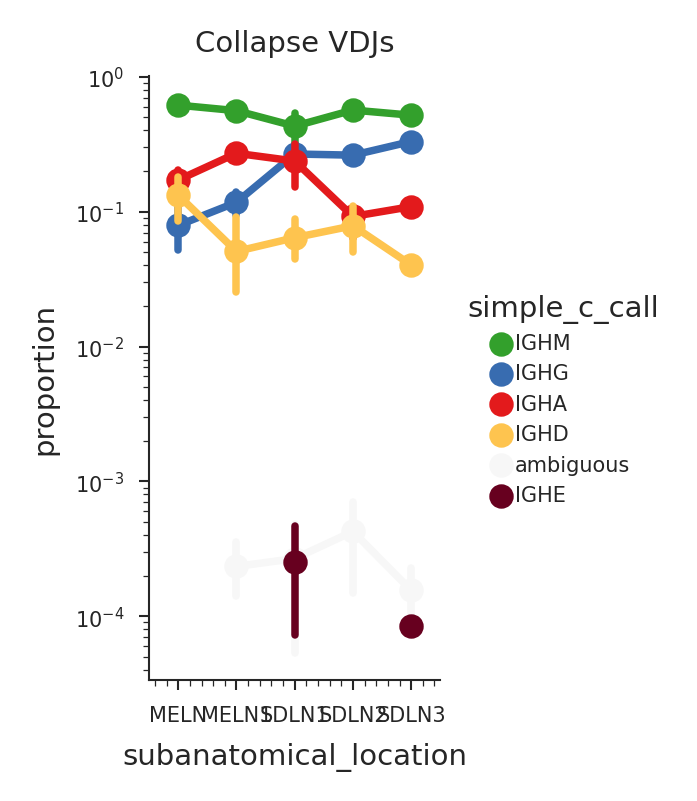

In [21]:
# Emulsion ID & collapse unique VDJs
order = ['MELN', "MELN1", "SDLN1", "SDLN2", "SDLN3" ]
IGH_simple_colors = {'IGHA': '#e31a1c',
            'IGHD': '#fec44f',
            'IGHM': '#33a02c',
            'IGHG': '#386cb0',
            'IGHE':'#67001f',
            "ambiguous":'#f7f7f7'     } 
g = sns.catplot(data = plot_data, order = order[:], kind = 'point',
            x='subanatomical_location', y = 'proportion', hue = 'simple_c_call', palette=IGH_simple_colors)
#g.ax.set_ylim(0,0.8)
g.ax.set_yscale("log")
g.ax.set_title("Collapse VDJs")
g.figure.set_size_inches(1.25,2.25)
sns.move_legend(g, loc='right', bbox_to_anchor = (1.5,0.5))

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


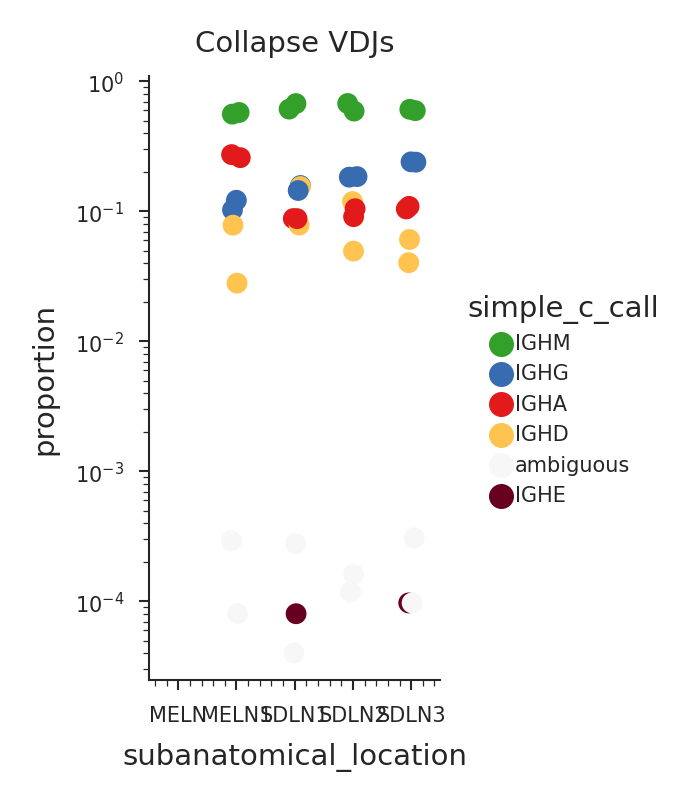

In [17]:
# Emulsion ID & collapse unique VDJs
order = ['MELN', "MELN1", "SDLN1", "SDLN2", "SDLN3" ]
IGH_simple_colors = {'IGHA': '#e31a1c',
            'IGHD': '#fec44f',
            'IGHM': '#33a02c',
            'IGHG': '#386cb0',
            'IGHE':'#67001f',
            "ambiguous":'#f7f7f7'     } 
g = sns.catplot(data = plot_data[plot_data.donor == 'TBd6'], order = order[:], 
            x='subanatomical_location', y = 'proportion', hue = 'simple_c_call', palette=IGH_simple_colors)
#g.ax.set_ylim(0,0.8)
g.ax.set_yscale("log")
g.ax.set_title("Collapse VDJs")
g.figure.set_size_inches(1.25,2.25)
sns.move_legend(g, loc='right', bbox_to_anchor = (1.5,0.5))

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


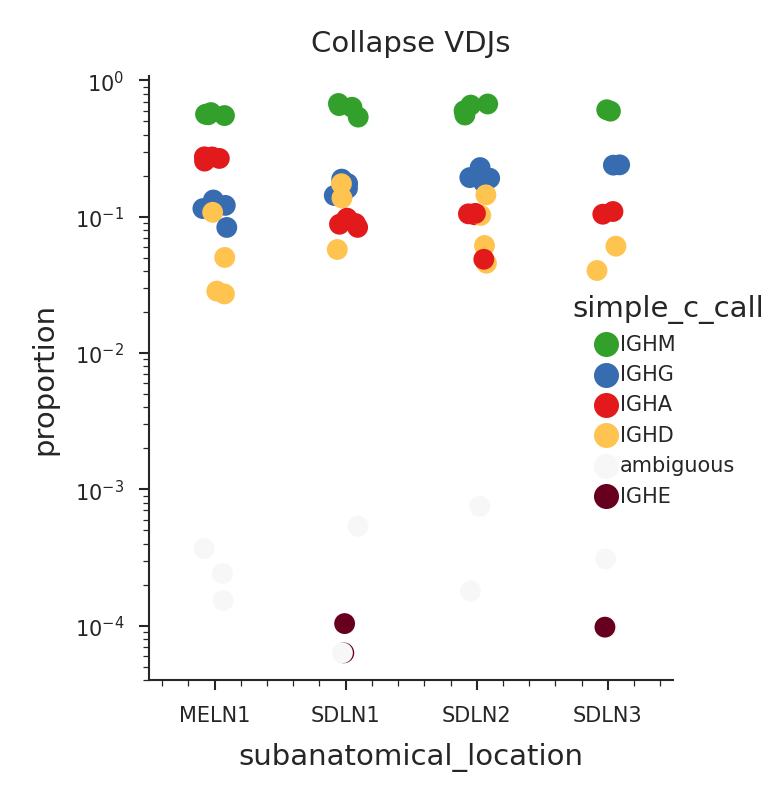

In [18]:
plot_data = data.groupby(['donor', 'sample_uid', 'subanatomical_location', 'vdj_sequence', 'simple_c_call']).size().reset_index()
plot_data = plot_data.groupby(['donor','subanatomical_location', 'sample_uid']).simple_c_call.value_counts(normalize = True).reset_index()
IGH_simple_colors = {'IGHA': '#e31a1c',
            'IGHD': '#fec44f',
            'IGHM': '#33a02c',
            'IGHG': '#386cb0',
            'IGHE':'#67001f',
            "ambiguous":'#f7f7f7'     } 
g = sns.catplot(data = plot_data[plot_data.donor == 'TBd6'], order = order[1:], 
            x='subanatomical_location', y = 'proportion', hue = 'simple_c_call', palette=IGH_simple_colors)
#g.ax.set_ylim(0,0.8)
g.ax.set_yscale("log")
g.ax.set_title("Collapse VDJs")
sns.move_legend(g, bbox_to_anchor(1.1,1))
g.figure.set_size_inches(2.25,2.25)

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


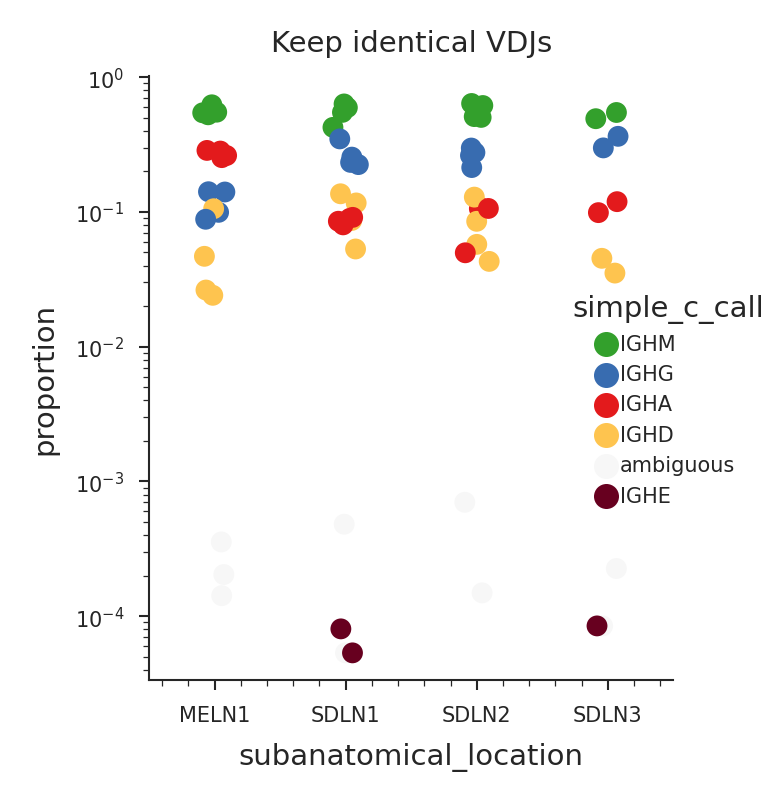

In [19]:
plot_data = pd.DataFrame(data.groupby(['sample_uid', 'subanatomical_location', 'donor']).simple_c_call.value_counts(normalize=True)).reset_index()

IGH_simple_colors = {'IGHA': '#e31a1c',
             'IGHD': '#fec44f',
             'IGHM': '#33a02c',
             'IGHG': '#386cb0',
             'IGHE':'#67001f',
                "ambiguous":'#f7f7f7'     }
g = sns.catplot(data = plot_data[plot_data.donor == 'TBd6'], order = order[1:], 
            x='subanatomical_location', y = 'proportion', hue = 'simple_c_call', palette=IGH_simple_colors)
#g.ax.set_ylim(0,0.8)
g.ax.set_yscale("log")
g.ax.set_title("Keep identical VDJs")
g.figure.set_size_inches(2.25,2.25)


In [79]:
suid = True
simple_c_call = True
# make simple column
collapse_unique = False
if collapse_unique:
    # collapse to unique vdjs
    print(data.shape[0], "antibody sequences")
    data = data.drop_duplicates(subset='vdj_sequence')
    print(data.shape[0], "unique VDJs left")
data.loc[:,"simple_c_call"] = data.c_call.str.replace("1|2|3|4", "", regex = True)

if simple_c_call:
    if suid:
        plot_df = pd.DataFrame(data.groupby(['sample_uid', 'subanatomical_location', 'donor']).simple_c_call.value_counts(normalize=True)).reset_index()
    else:
        plot_df = pd.DataFrame(data.groupby(['subanatomical_location', 'donor']).simple_c_call.value_counts(normalize=True)).reset_index()
else:    
    if suid:
        plot_df = pd.DataFrame(data.groupby(['sample_uid', 'subanatomical_location', 'donor']).c_call.value_counts(normalize=True)).reset_index()
    else:
        plot_df = pd.DataFrame(data.groupby(['subanatomical_location', 'donor']).c_call.value_counts(normalize=True)).reset_index()

/home/michaelswift/miniconda3/envs/scanpy_new/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'All VDJs')

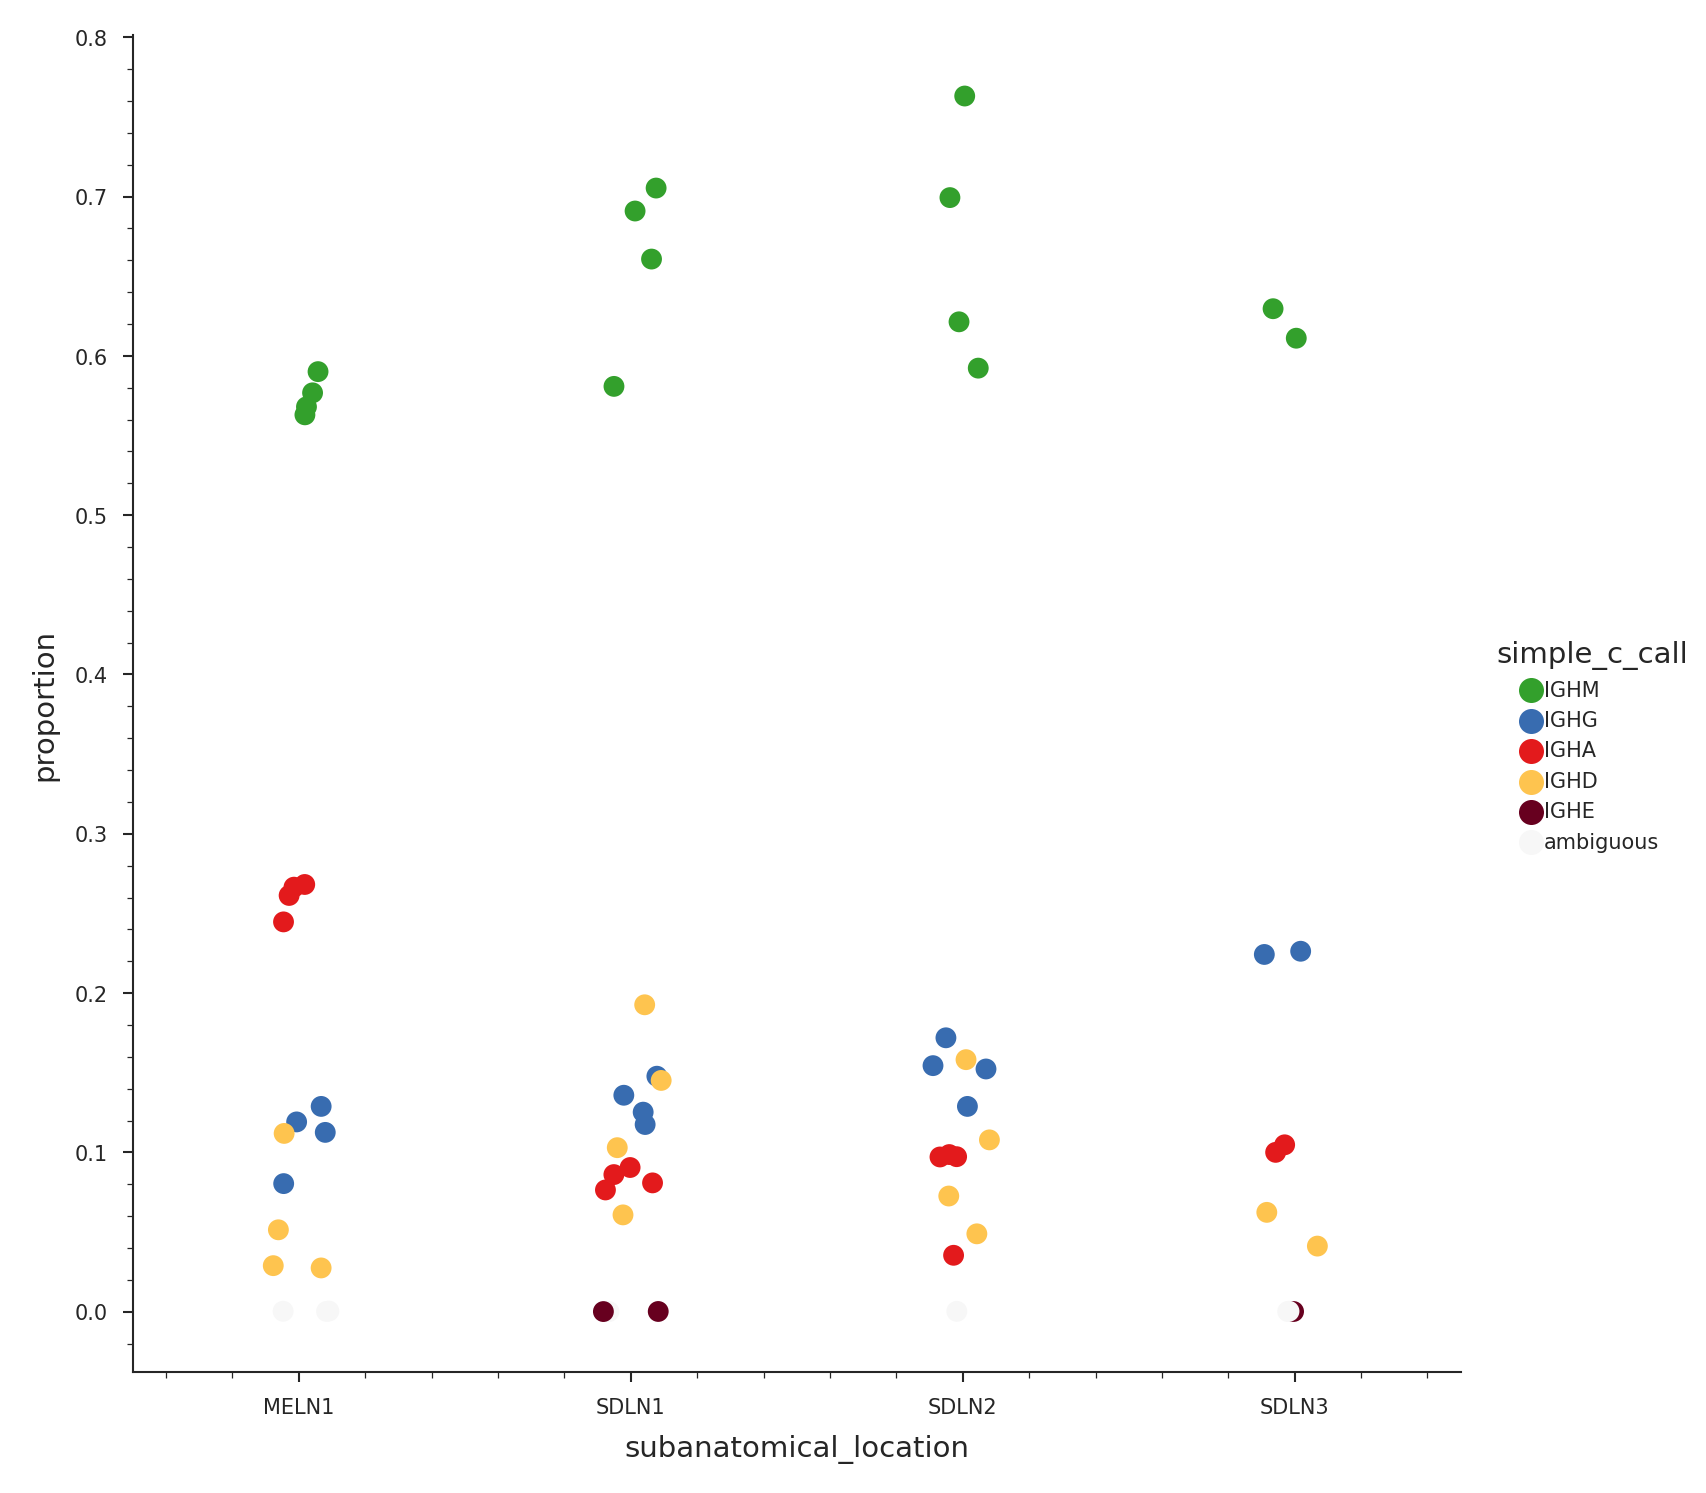

In [97]:
IGH_simple_colors = {'IGHA': '#e31a1c',
             'IGHD': '#fec44f',
             'IGHM': '#33a02c',
             'IGHG': '#386cb0',
             'IGHE':'#67001f',
                "ambiguous":'#f7f7f7'     }
sns.catplot(data = plot_df[plot_df.donor == 'TBd6'], order = order[1:], 
            x='subanatomical_location', y = 'proportion', hue = 'simple_c_call', palette=IGH_simple_colors)
ax.set_yscale('log')


In [ ]:

fig, ax = plt.subplots(1,1, figsize = (4,4))
sns.swarmplot(data = plot_df, x='subanatomical_location', y = 'proportion', hue = 'c_call')
ax.set_yscale('log')


fig, ax = plt.subplots(1,1, figsize = (4,4))
sns.pointplot(data = plot_df, order = order, x='subanatomical_location', y = 'proportion', hue = 'c_call')
ax.set_yscale('log')

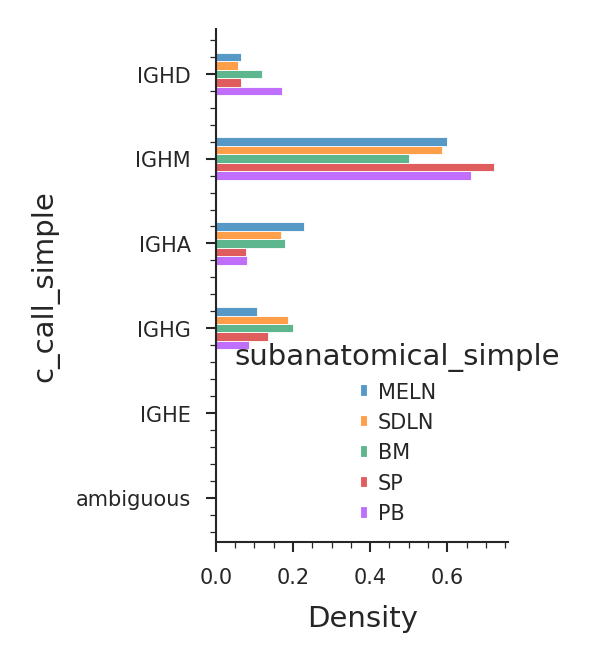

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (1.25, 2.25))
ax = sns.histplot(data = data, y = 'c_call_simple', hue='subanatomical_simple', multiple="dodge", 
                  stat = 'density', common_norm=False, shrink = 0.5)